# 01 Data Mining Basics
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

-----

## What is Data Mining?
* Data mining is the process of getting info from data. Really, all three semesters can be summarized as Data Mining
  * Originally known as "Data Dredging", it was the process of trying to extract information that isn't always supported by the data. Not the most glamorous part of a statistician's job
  * Later it focused more as "Big Data", which is gleaning information from large amounts of data
  * Now known as "Data Mining", we now extract this information for the purpose of creating a model (which gets into adaptive modelling, or "Machine Learning")
* This semester, we focus on Big Data: handling and managing large amounts of data

## Things Useful to Know

### Importance of Words
What makes a word in a document important? 
* Words appearing most frequently?
  * The most frequent words will always be common non-useful terms such as "the" or "and" (aka "stop words")
  * ---Draw 1D line for frequency---
    * Low: "Notwithstanding", "Albeit", "Conclusion"
    * High: "the", "and"
* Rare words
  * A lot of rare words are only used to help in sentence flow, such as "notwithstanding", "albeit", or "conclusion"
  * ---Draw 1D line for rarity---
    * Rare: "Notwithstanding", "Albeit"
    * Common: "the", "and", "conclusion"

*The difference between rare words that tell us something and those that do not has to do with the concentration (frequency) of the useful words in just a few documents.*
  * ---Draw 2D grid: x-axis rare to common, y-axis Low f to High f---
  * High f, common: "the", "and"
  * Low f, common: "conclusion"
  * Low f, rare: "notwithstanding", "albeit"
  * The important words are those that have high f and are rare (only occur with high frequency in just a few documents)

We'll calculate using the $TF.IDF$ (Term Frequency times Inverse Document Frequency)
* Term frequency ($TF_{ij}$): number of occurrences of word $i$ normalized in document $j$
$$TF_{ij} = \frac{f_{ij}}{max_k f_{kj}}$$

| __*Frequency*__ | Doc 0 | Doc 1 | Doc 2 |
| --------------: | :---: | :---: | :---: |
|          Word 0 |   7   |   8   |   4   |
|          Word 1 |   2   |   4   |   6   |
|          Word 2 |   5   |   9   |   0   |

$$max_k f_{k0} = 7 \qquad max_k f_{k1} = 9 \qquad max_k f_{k2} = 6$$

| __*TF*__ | Doc 0 | Doc 1 | Doc 2 |
| -------: | :---: | :---: | :---: |
|   Word 0 |   1   |  8/9  |  2/3  |
|   Word 1 |  2/7  |  4/9  |   1   |
|   Word 2 |  5/7  |   1   |   0   |

* Inverse Document Frequency ($IDF_i$): Inverse ratio of documents containing word $i$ on a logarithmic scale
  * If $n_i$ documents out of $N$ documents contain word $i$, then the ratio is $\frac{n_i}{N}$
  * The inverse ratio is $\frac{N}{n_i}$
  * Put onto a logarithmic scale

/tmp/ipykernel_754/2409693475.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x,np.log(N/x))


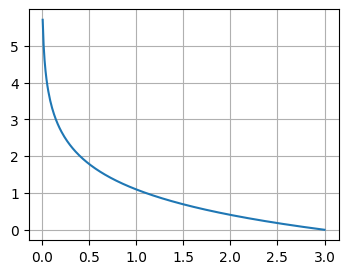

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
x = np.linspace(0, N, N*100 + 1)

#plt.rcParams['figure.figsize'] = 4, 3
fig,ax = plt.subplots(figsize=(4,3))

ax.plot(x,np.log(N/x))
ax.grid(True)
plt.show()

On an inverse logarithmic scale, words that appear in fewer documents ($n_i$) will give a large $IDF$, which should be the case for words that are unique to specific topics. But if the word appears in more documents, then the $IDF$ will approach 0.
$$IDF_i = \log_2\left(\frac{N}{n_i}\right)$$

| __*TF*__ | Doc 0 | Doc 1 | Doc 2 |
| -------: | :---: | :---: | :---: |
|   Word 0 |   1   |  8/9  |  2/3  |
|   Word 1 |  2/7  |  4/9  |   1   |
|   Word 2 |  5/7  |   1   |   0   |

$$IDF_0 = \log_2\left(\frac{3}{3}\right) = 0 \qquad IDF_1 = \log_2\left(\frac{3}{3}\right) = 0 \qquad IDF_2 = \log_2\left(\frac{3}{2}\right) = 0.58$$

| __*TF.IDF*__ | Doc 0              | Doc 1           | Doc 2        |
| -----------: | :----------------: | :-------------: | :----------: |
|       Word 0 | $$1*0=0$$          | $$8/9*0=0$$     | $$2/3*0=0$$  |
|       Word 1 | $$2/7*0=0$$        | $$4/9*0=0$$     | $$1*0=0$$    |
|       Word 2 | $$5/7*0.58=0.418$$ | $$1*0.58=0.58$$ | $$0*0.58=0$$ |

Word 2 is the most significant word in all documents, and is most significant in Doc 1.

##### __HW 1 Q 1__
* Give 6 documents and 20 words
* Do a word search for the 20 words in each document
* Calculate $TF_{ij}$ for each word ($i$) and document ($j$)
* Calculate $IDF_i$ for each word ($i$)
* Calculate $TF.IDF$

### Hash Functions
When we need to search for a particular value, we could simply go through all the values until we find the one we want. This is called a __linear search__. For small datasets, this works just fine. But for large datasets, this is inefficient.

A __hash function__ takes some key value related to the data and produces a __bucket number__. That is, we take something intuitive about the data (ID, name, timestamp,...) and do some calculation on it to determine what bucket, or place in our array, the data should be stored. Then when we want to recall that data, we do the same calculation, and we know exactly where that data is stored.

The following three examples demonstrate how one common hash function works, and presents a potential issue.

*Example 1*:
> You have data for 10 patients that you want to store in the database.
> * Their IDs are:
>   * [100, 186, 152, 199, 103, 127, 175, 131, 114, 148]
> * To determine the bucket to store the data in, take the modulus of each ID with the number of elements (10)
>   * [0, 6, 2, 9, 3, 7, 5, 1, 4, 8]
> * Store the data:
>   * `ID = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]`
>   * `ID = [100, ___, ___, ___, ___, ___, ___, ___, ___, ___]`
>   * `ID = [100, ___, ___, ___, ___, ___, 186, ___, ___, ___]`
>   * `ID = [100, ___, 152, ___, ___, ___, 186, ___, ___, ___]`
>   * `ID = [100, ___, 152, ___, ___, ___, 186, ___, ___, 199]`
>   * `ID = [100, ___, 152, 103, ___, ___, 186, ___, ___, 199]`
>   * `ID = [100, ___, 152, 103, ___, ___, 186, 127, ___, 199]`
>   * `ID = [100, ___, 152, 103, ___, 175, 186, 127, ___, 199]`
>   * `ID = [100, 131, 152, 103, ___, 175, 186, 127, ___, 199]`
>   * `ID = [100, 131, 152, 103, 114, 175, 186, 127, ___, 199]`
>   * `ID = [100, 131, 152, 103, 114, 175, 186, 127, 148, 199]`
> * If you want patient 186, take the modulus $186 mod 10 = 6$. The data is in bucket 6 for all lists.
>   * `ID[6] = 186`, `name[6]`, `weight[6]`, ...

*Example 2*:

This example is the same as example 1, but notice that some of the calculations repeat bucket numbers:
> You have data for 10 patients that you want to store in the database.
> * Their IDs are:
>   * [245, 287, 261, 295, 233, 209, 276, 284, 260, 221]
> * To determine the bucket to store the data in, take the modulus of each ID with the number of elements (10)
>   * [5, 7, 1, 5, 6, 3, 6, 1, 4, 8]
> * Store the data:
>   * `ID = [___, ___, ___, ___, ___, 245, ___, ___, ___, ___]`
>   * `ID = [___, ___, ___, ___, ___, 245, ___, 287, ___, ___]`
>   * `ID = [___, 261, ___, ___, ___, 245, ___, 287, ___, ___]`
> * The next is 295 going into bucket 5. But bucket 5 is already filled. So, fill the next bucket.
>   * `ID = [___, 261, ___, ___, ___, 245, 295, 287, ___, ___]`
>   * `ID = [___, 261, ___, 233, ___, 245, 295, 287, ___, ___]`
>   * `ID = [___, 261, ___, 233, ___, 245, 295, 287, ___, 209]`
> * The next is 276 going into bucket 6. But bucket 6 is already filled. So, go to the next bucket, but that is also filled. Just keep going and fill the next available bucket.
>   * `ID = [___, 261, ___, 233, ___, 245, 295, 287, 276, 209]`
>   * `ID = [___, 261, ___, 233, 284, 245, 295, 287, 276, 209]`
>   * `ID = [260, 261, ___, 233, 284, 245, 295, 287, 276, 209]`
> * The next is 221 going into bucket 1. But bucket 1 is already filled. So, fill the next bucket.
>   * `ID = [260, 261, 221, 233, 284, 245, 295, 287, 276, 209]`
> * If you want patient 233, take the modulus $233 mod 10 = 3$. The data is in bucket 3 for all lists.
>   * `ID[3] = 233`, `name[3]`, `weight[3]`, ...
> * If you want patient 276, take the modulus $276 mod 10 = 6$. But this time, the data isn't in bucket 6. Go to bucket 6 and start a linear search from there.
>   * `ID[6] = 295`
>   * `ID[7] = 287`
>   * `ID[8] = 276` is a match!
>   * The data is in bucket 8 for all lists.
>   * `ID[8] = 276`, `name[8]`, `weight[8]`, ...

*Example 3*:

In this example, we use names instead of IDs.
> You have data for 5 patients that you want to store in the database.
> * Their names are:
>   * [Jon, Sue, Sam, Dan, Ted]
> * Create a numberical value by adding the ASCII codes for each character in the name. Then take the modulus of that result with the number of patients (5).
>   * 'Jon' = 74 + 111 + 110 = 295 --> 295 mod 5 = 0
>   * 'Sue' = 83 + 117 + 101 = 301 --> 301 mod 5 = 1
>   * 'Sam' = 83 +  97 + 109 = 289 --> 289 mod 5 = 4
>   * 'Dan' = 68 +  97 + 110 = 275 --> 275 mod 5 = 0
>   * 'Ted' = 84 + 101 + 100 = 285 --> 285 mod 5 = 0
> * Store the data:
>   * `ID = [Jon, ___, ___, ___, ___]`
>   * `ID = [Jon, Sue, ___, ___, ___]`
>   * `ID = [Jon, Sue, ___, ___, Sam]`
>   * `ID = [Jon, Sue, Dan, ___, Sam]`
>   * `ID = [Jon, Sue, Dan, Ted, Sam]`

Notice how in this last example, finding the record for Ted is almost as many tests as just doing a linear search. Certain datapoints could have that issue. But for the most part, this is a very straightforward hash function that simplifies the search process. On the whole, the number of calculations needed to find a name has dropped drastically.

Some ways to further decrease these calculations:
* Make the number of buckets larger than the actual datapoints. That way there is more space, and less chance for overlap.
* Make the number of buckets prime.

### Base of Natural Logarithms
1. Limit of natural number
2. Taylor Expansion

#### Limit of natural number
$$\lim_{x\to\infty} \left(1+\frac{1}{x}\right)^x = 2.718281828... = e$$

This can be used to better approximate certain calculations:
$$\left(1+a\right)^b \qquad \text{let }a = \frac{1}{x}\text{ or }\frac{1}{a}=x$$
$$\left(1+\frac{1}{x}\right)^{xab} = \left(\left(1+\frac{1}{x}\right)^x\right)^{ab}$$

When $a$ is small, then $\frac{1}{x}$ gets very large. Then,
$$\left(\left(1+\frac{1}{x}\right)^x\right)^{ab} \to e^{ab}$$

So,
$$\left(1+a\right)^b = e^{ab}$$

*Example*:
$$1.001^2 = 1.002001$$

Using the limit to $e$,
$$1.001^2 = (1 + 0.001)^2 \qquad a=0.001 \qquad x = \frac{1}{a}=1000$$
$$1.001^2 = \left(\left(1+\frac{1}{1000}\right)^{1000}\right)^{0.001*2} \approx e^{0.002} = 1.002002001$$

As $a$ gets smaller, then $x$ gets bigger and this approximation becomes more accurate.

In [3]:
import numpy as np
for i in range(10):
    x = 10**i
    a = 1/x
    n = 1+a
    print(f"Run {i}: {n}^2 = (1+{a})^2 = {np.exp(2*a)}")

Run 0: 2.0^2 = (1+1.0)^2 = 7.38905609893065
Run 1: 1.1^2 = (1+0.1)^2 = 1.2214027581601699
Run 2: 1.01^2 = (1+0.01)^2 = 1.0202013400267558
Run 3: 1.001^2 = (1+0.001)^2 = 1.0020020013340003
Run 4: 1.0001^2 = (1+0.0001)^2 = 1.0002000200013335
Run 5: 1.00001^2 = (1+1e-05)^2 = 1.0000200002000013
Run 6: 1.000001^2 = (1+1e-06)^2 = 1.000002000002
Run 7: 1.0000001^2 = (1+1e-07)^2 = 1.00000020000002
Run 8: 1.00000001^2 = (1+1e-08)^2 = 1.00000002
Run 9: 1.000000001^2 = (1+1e-09)^2 = 1.000000002


#### Taylor Expansion
Another useful application:
$$e^x = \sum_{i=1}^\infty \frac{x^i}{i!} = 1+x+\frac{x^2}{2} + \frac{x^3}{6} + \frac{x^4}{24} + ...$$

This gives a very simple way for a machine to calculate powers.

*Example*:
$$e^{10} = 22,026.46579$$

Using the Taylor Expansion:
$$e^{10} = \sum_{i=0}^\infty \frac{10^i}{i!} = 1 + 10 + \frac{100}{2} + \frac{1000}{6} + \frac{10000}{24} + ...$$

In [10]:
approx = 0
factorial = 1

for i in range(40):
    if i>0: factorial *= i
    approx += 10**i / factorial
    print(f"i = {i:2d}: e^10 = {approx}")

i =  0: e^10 = 1.0
i =  1: e^10 = 11.0
i =  2: e^10 = 61.0
i =  3: e^10 = 227.66666666666666
i =  4: e^10 = 644.3333333333334
i =  5: e^10 = 1477.6666666666667
i =  6: e^10 = 2866.5555555555557
i =  7: e^10 = 4850.68253968254
i =  8: e^10 = 7330.84126984127
i =  9: e^10 = 10086.573192239859
i = 10: e^10 = 12842.305114638448
i = 11: e^10 = 15347.51595318262
i = 12: e^10 = 17435.191651969428
i = 13: e^10 = 19041.09603565159
i = 14: e^10 = 20188.170595424563
i = 15: e^10 = 20952.886968606545
i = 16: e^10 = 21430.834701845284
i = 17: e^10 = 21711.980427279836
i = 18: e^10 = 21868.172496965697
i = 19: e^10 = 21950.37884943194
i = 20: e^10 = 21991.482025665064
i = 21: e^10 = 22011.054966728454
i = 22: e^10 = 22019.951758120904
i = 23: e^10 = 22023.819928291534
i = 24: e^10 = 22025.43166586263
i = 25: e^10 = 22026.076360891067
i = 26: e^10 = 22026.32432051739
i = 27: e^10 = 22026.416157416028
i = 28: e^10 = 22026.4489563084
i = 29: e^10 = 22026.460266271286
i = 30: e^10 = 22026.464036258916
i

### Power Laws
When two variables $x$ and $y$ are related by a power law ($y=cx^a$), then they have a linear relationship between the logarithms of those variables ($\log y = b + a\log x$)

$$\log_{10} y = 6 + 2\log_{10} x$$
$$y = 10^6 10^{(2\log_{10} x)}$$
$$y = 10^6 10^{\log_{10} x^2}$$
$$y = 10^6 x^2$$

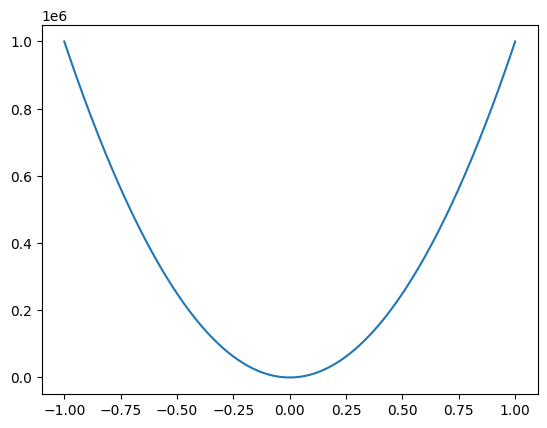

In [16]:
x = np.linspace(-1,1,201)
y = 10**6 * x**2

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

/tmp/ipykernel_754/2630612108.py:1: RuntimeWarning: divide by zero encountered in log10
  log_x = np.log10(x)
/tmp/ipykernel_754/2630612108.py:1: RuntimeWarning: invalid value encountered in log10
  log_x = np.log10(x)


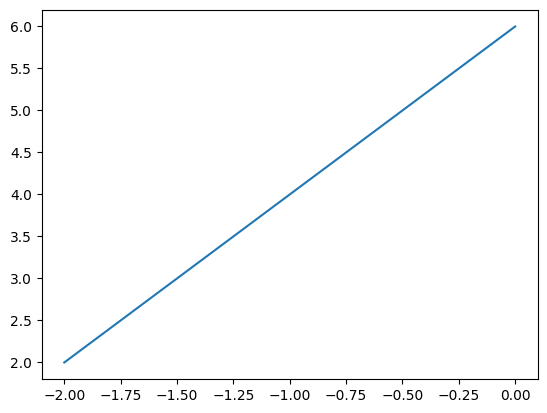

In [17]:
log_x = np.log10(x)
log_y = 6 + 2*log_x

plt.plot(log_x,log_y)
plt.show()